# <center><font color="green">PUBG GAME PREDICITION</font></center>

<center><img src ="https://media.tenor.com/fCy1I9Lzv5YAAAAM/nojin.gif"></center>

# Importing libaries <a class="anchor" id="import">

Reading data <a class="anchor" id="read"></a>

In [51]:
#standard libaries
import numpy as np
import pandas as pd
#visulation
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 6)
import seaborn as sns
#handaling warnings
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("PUBG_Game_Prediction_data.csv")

In [6]:
#glimpse of the data
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [7]:
#data dimensions
df.shape

(4446966, 29)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

## PlayerUnknown's Battlegrounds (PUBG) Data Description

- **DBNOs**: Number of enemy players knocked.
- **assists**: Number of enemy players this player damaged that were killed by teammates.
- **boosts**: Number of boost items used.
- **damageDealt**: Total damage dealt. Note: Self-inflicted damage is subtracted.
- **headshotKills**: Number of enemy players killed with headshots.
- **heals**: Number of healing items used.
- **Id**: Player’s Id
- **killPlace**: Ranking in the match of the number of enemy players killed.
- **killPoints**: Kills-based external ranking of the player. If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as “None”.
- **killStreaks**: Max number of enemy players killed in a short amount of time.
- **kills**: Number of enemy players killed.
- **longestKill**: Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- **matchDuration**: Duration of the match in seconds.
- **matchId**: ID to identify the match. There are no matches that are in both the training and testing set.
- **matchType**: String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- **rankPoints**: Elo-like ranking of the player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. A value of -1 takes place of “None”.
- **revives**: Number of times this player revived teammates.
- **rideDistance**: Total distance traveled in vehicles measured in meters.
- **roadKills**: Number of kills while in a vehicle.
- **swimDistance**: Total distance traveled by swimming measured in meters.
- **teamKills**: Number of times this player killed a teammate.
- **vehicleDestroys**: Number of vehicles destroyed.
- **walkDistance**: Total distance traveled on foot measured in meters.
- **weaponsAcquired**: Number of weapons picked up.
- **winPoints**: Win-based external ranking of the player. If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as “None”.
- **groupId**: ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- **numGroups**: Number of groups we have data for in the match.
- **maxPlace**: Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- **winPlacePerc**: The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.


### DATA WRANGLING

In [25]:
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined


### Understanding players distribution in a game

In [26]:
#prepare new parameter to know how many players are in a game
df['playersJoined'] = df.groupby('matchId')['matchId'].transform('count')

In [27]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


### Analysis the data

-->kills by moving ???

<center><img src="https://media1.tenor.com/m/z3zxvCZvm9AAAAAd/snipe-nice.gif"></center>

In [31]:
#perpare the data parameter to gather the information of the total distance travelled
df['totalDistance']=df['rideDistance']+df['walkDistance']+df['swimDistance']

In [32]:
'''perepare the data parameter to check for anamolgy detection that the person has not
moved but still managed to do the kill'''
df['killswithoutMoving'] = ((df['kills']>0) & (df['totalDistance'] ==0))

In [33]:
df[df['killswithoutMoving']==True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killswithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [34]:
df[df['killswithoutMoving']==True].shape

(1535, 32)

In [35]:
#drop the table
df.drop(df[df['killswithoutMoving']==True].index,inplace=True)

-->Extra-ordinary Road kills????

In [37]:
df[df['roadKills']>5].shape

(46, 32)

In [38]:
df.drop(df[df['roadKills']>5].index,inplace=True)

### so many kills--How???

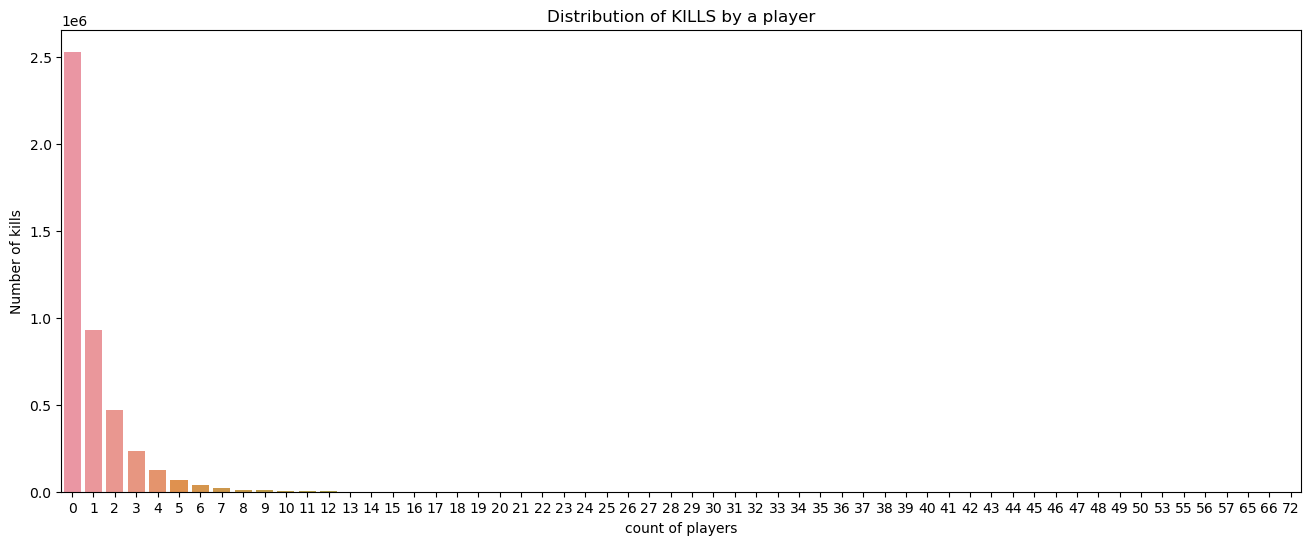

In [40]:
sns.countplot(data=df,x=df['kills']).set_title("Distribution of KILLS by a player")
plt.xlabel("count of players")
plt.ylabel("Number of kills")
plt.show()

In [46]:
#data dimensions
df[df['kills']>20].shape

(417, 32)

In [47]:
#drop the instances
df.drop(df[df['kills']>20].index,inplace=True)

<center><img src="https://media1.tenor.com/m/U2MFO7lfuB0AAAAd/8x-headshot.gif"></center>

In [49]:
df['headshot_rate']=df['headshotKills']/df['kills']
df['headshot_rate']=df['headshotKills'].fillna(0)

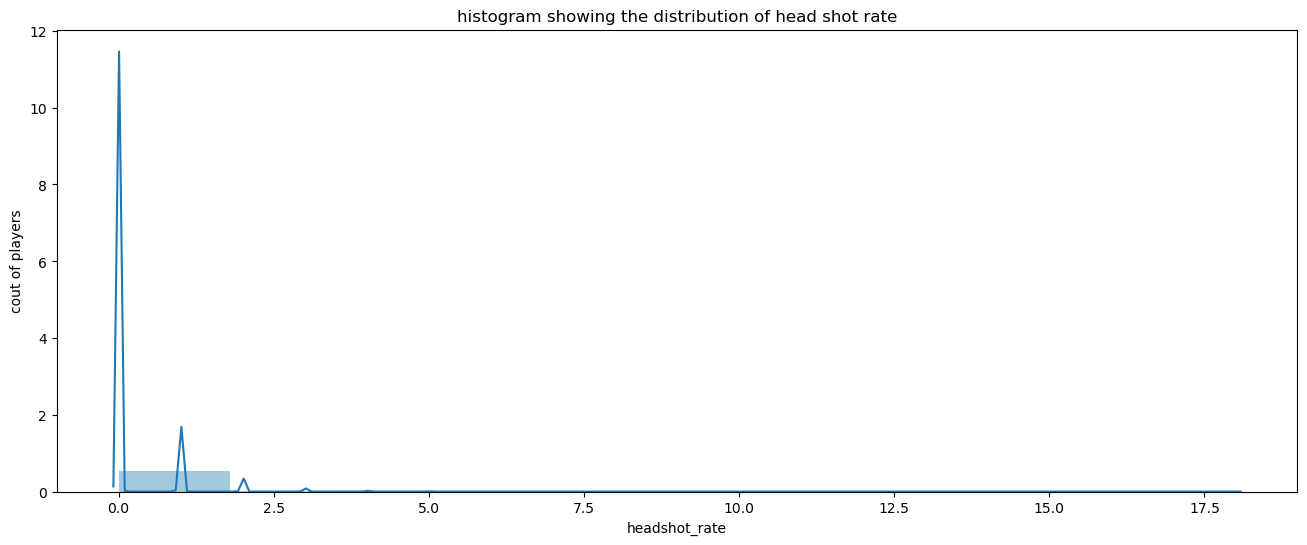

In [52]:
#plot the headset rate distribution 
sns.distplot(df['headshot_rate'],bins=10).set_title("histogram showing the distribution of head shot rate")
plt.ylabel("cout of players")
plt.show()

In [54]:
df[(df['headshot_rate']==1)&(df['kills']>5)].shape

(25669, 33)

In [55]:
df.drop(df[(df['headshot_rate']==1)&(df['kills']>6)].index,inplace=True)

### longest shot


Text(0.5, 1.0, 'histogram showing the logest kill distribution')

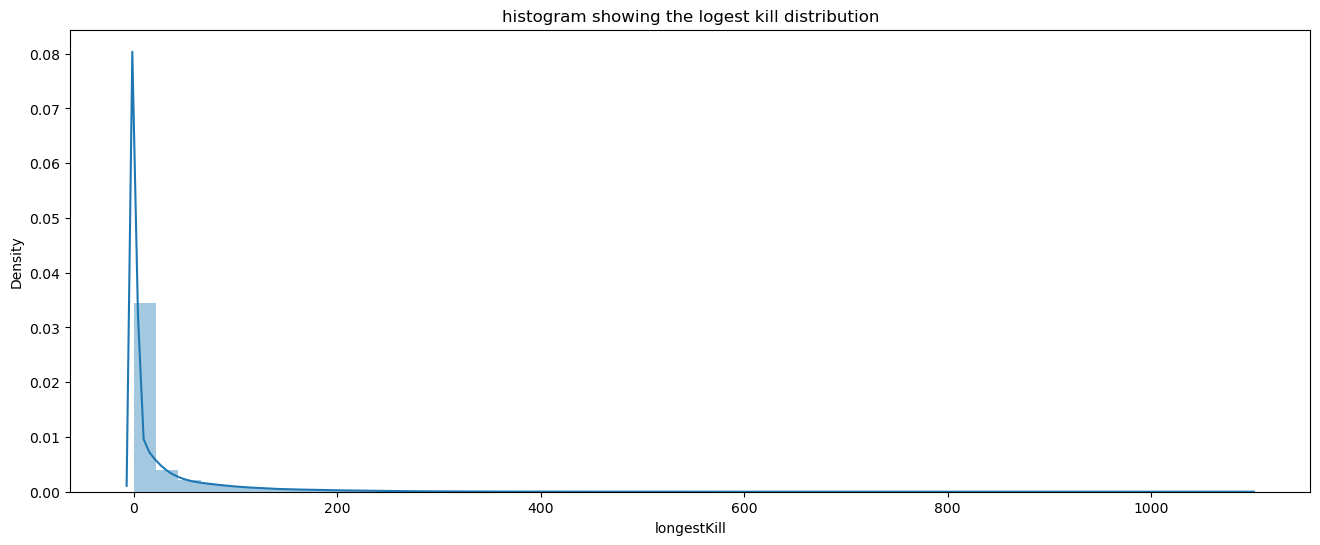

In [58]:
sns.distplot(df['longestKill'],bins=50).set_title("histogram showing the logest kill distribution")

In [60]:
df[df['longestKill']>=500].shape
df.drop(df[df['longestKill']>=500].index,inplace=True)

### weapon change

Text(0.5, 1.0, 'weapons Distribution')

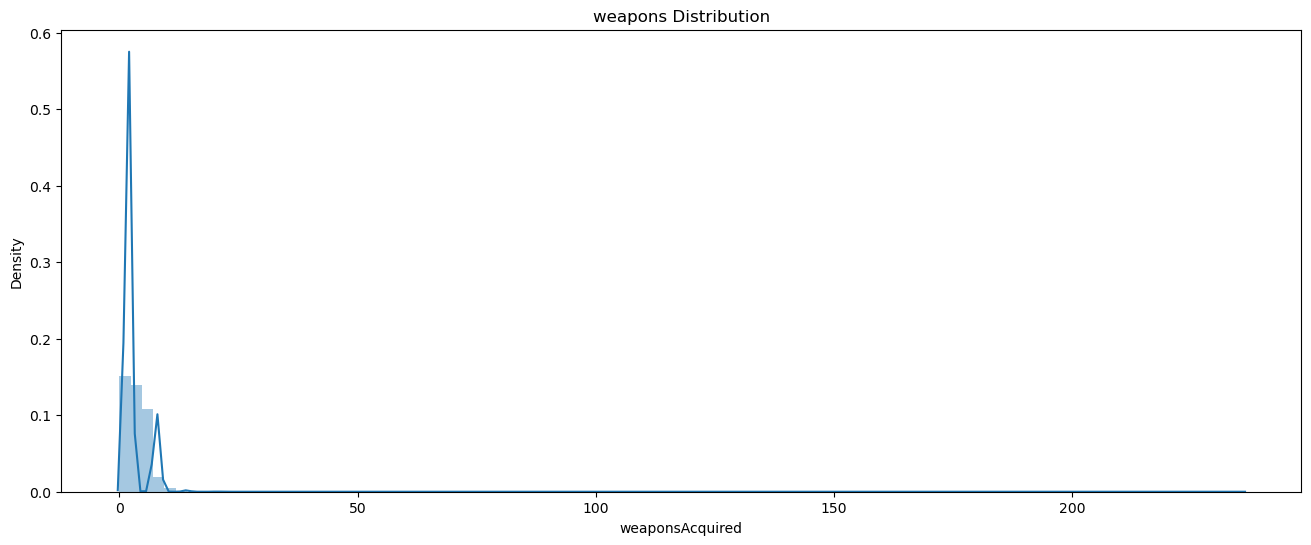

In [62]:
sns.distplot(df['weaponsAcquired'],bins=100).set_title('weapons Distribution')


In [63]:
df[df['weaponsAcquired']>=15].shape

(6303, 33)

In [64]:
df.drop(df[df['weaponsAcquired']>=15].index,inplace=True)

In [65]:
df.shape

(4424092, 33)

In [67]:
df.isna().sum()

Id                    0
groupId               0
matchId               0
assists               0
boosts                0
damageDealt           0
DBNOs                 0
headshotKills         0
heals                 0
killPlace             0
killPoints            0
kills                 0
killStreaks           0
longestKill           0
matchDuration         0
matchType             0
maxPlace              0
numGroups             0
rankPoints            0
revives               0
rideDistance          0
roadKills             0
swimDistance          0
teamKills             0
vehicleDestroys       0
walkDistance          0
weaponsAcquired       0
winPoints             0
winPlacePerc          0
playersJoined         0
totalDistance         0
killswithoutMoving    0
headshot_rate         0
dtype: int64

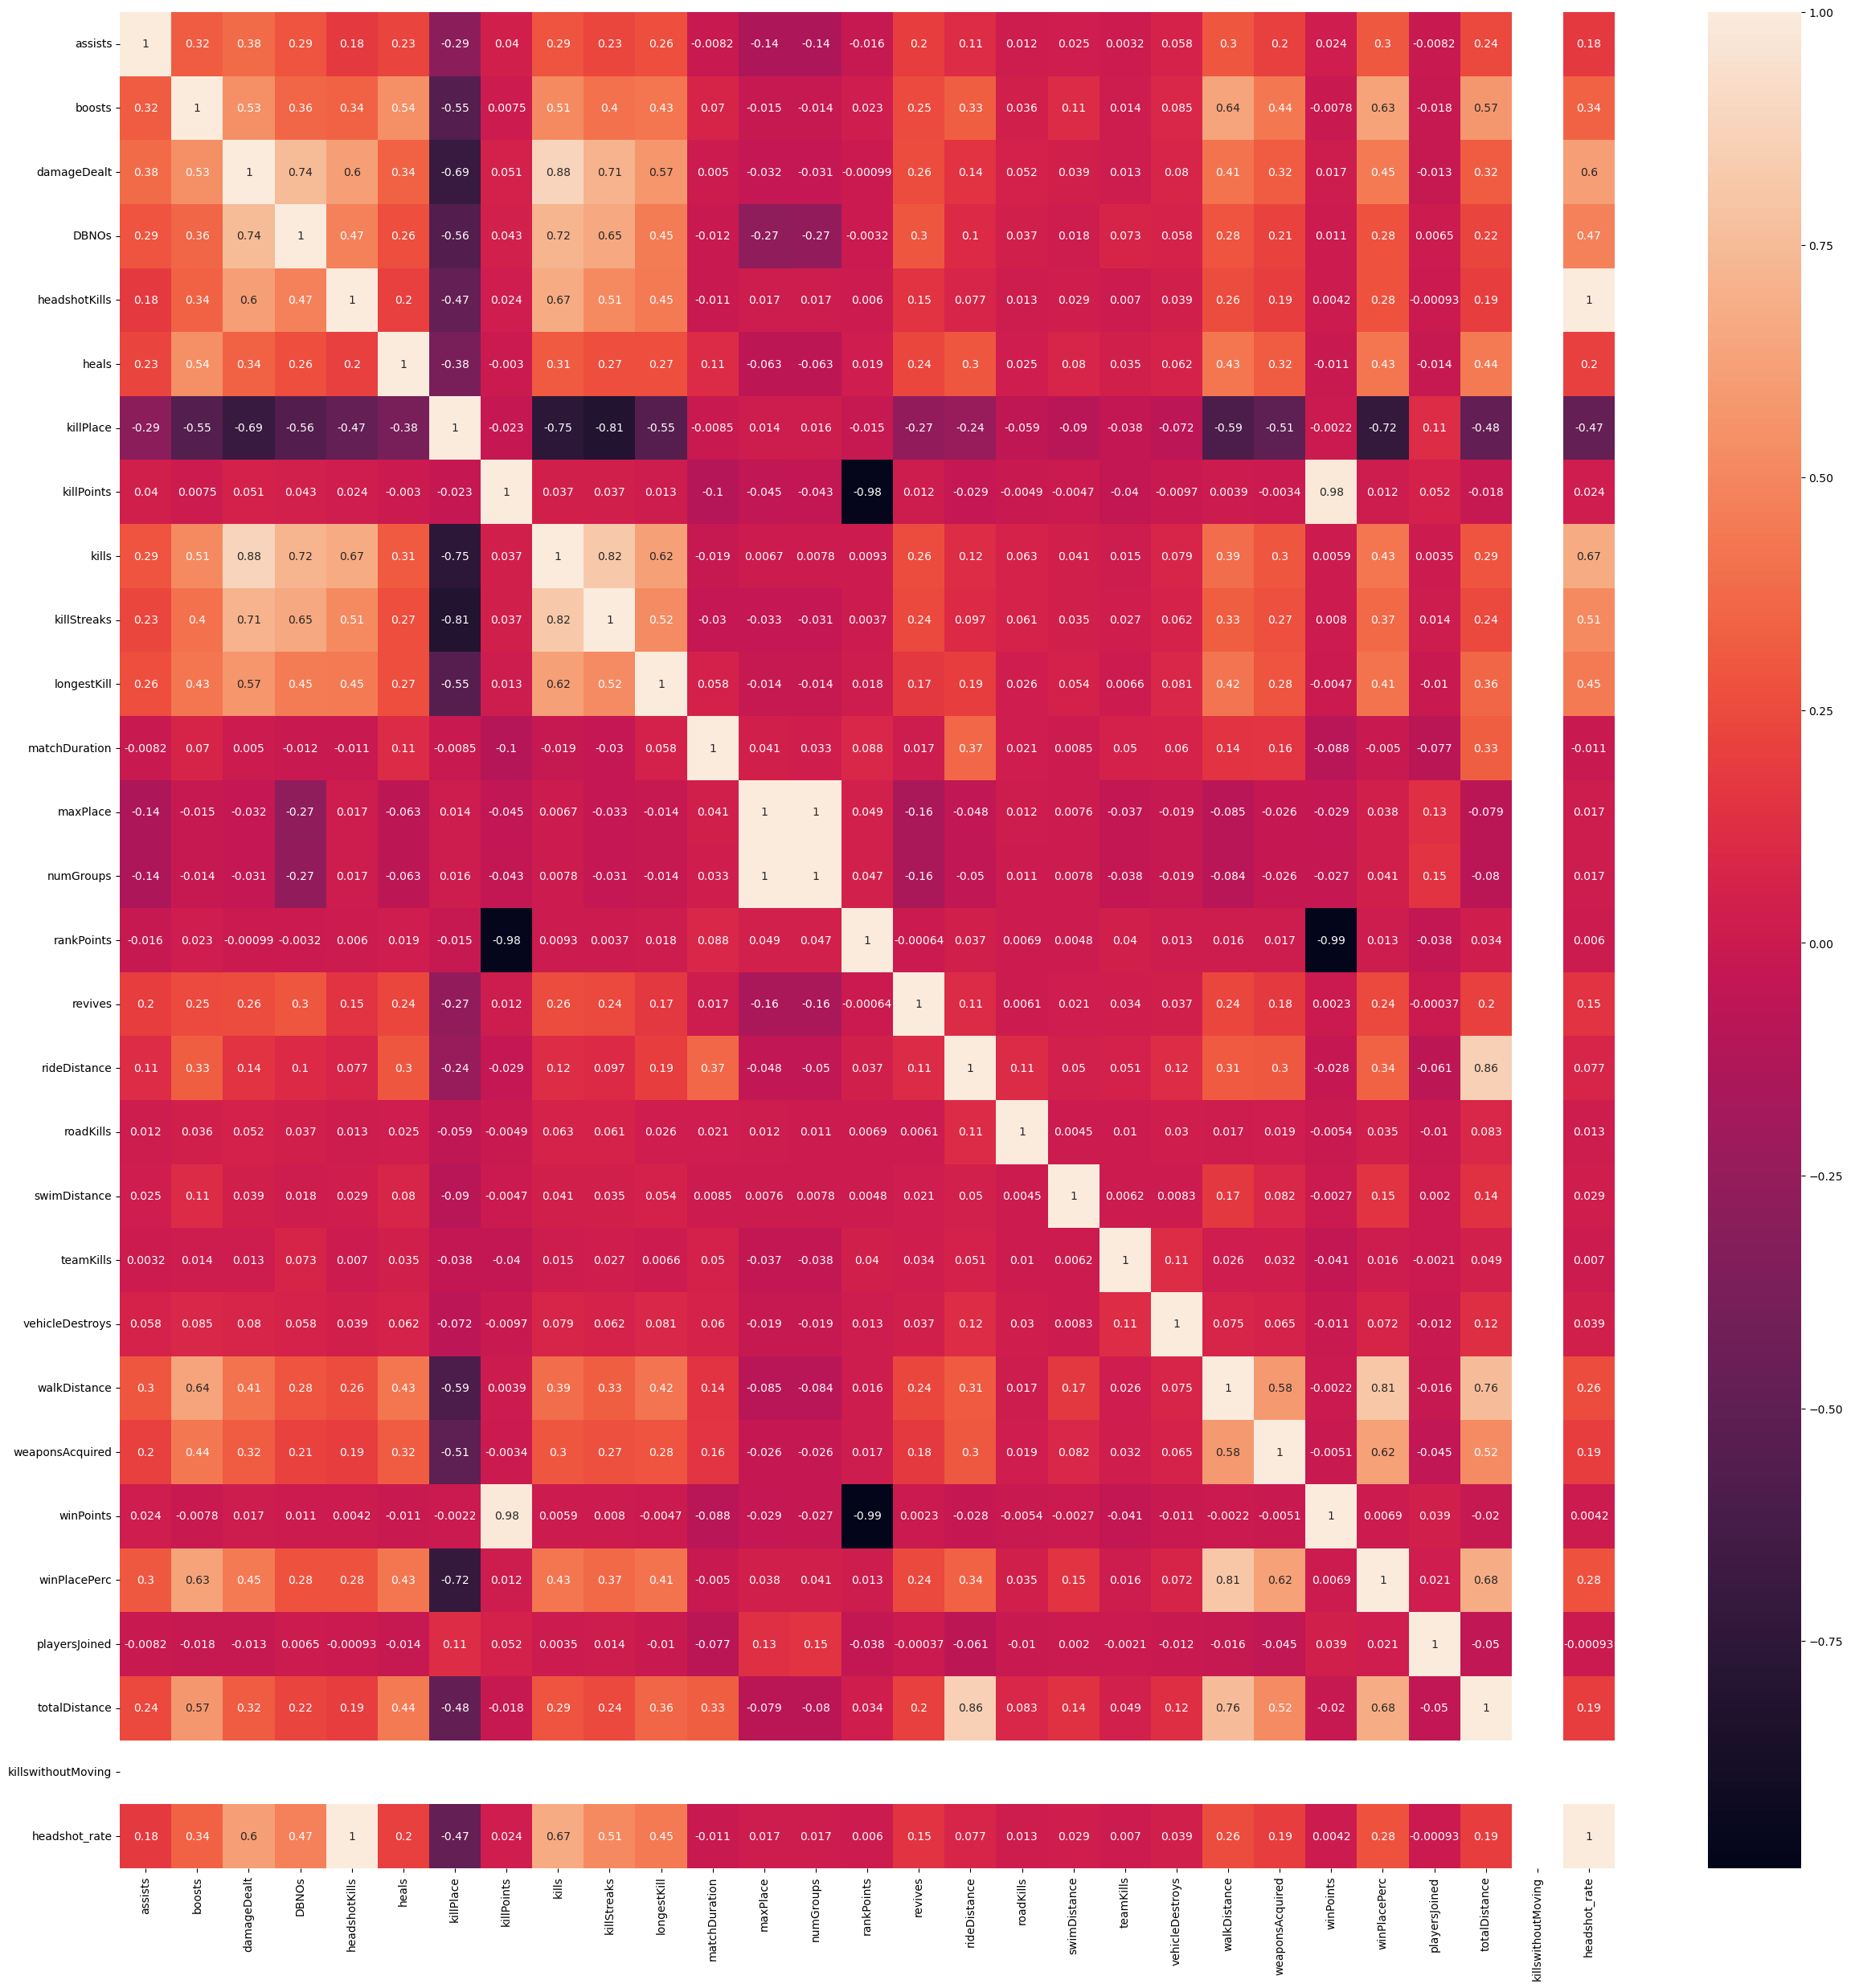

In [68]:
plt.figure(figsize=[30,30])
sns.heatmap(df.corr(),annot=True)
plt.show()

### feature engineering

In [70]:
normalising_factor=(100-df['playersJoined']/100)+1

In [71]:
df['killsNorm'] = df['kills'] * normalising_factor
df['damageDealtNorm'] = df['damageDealt'] * normalising_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalising_factor
df['matchDurationNorm'] = df['matchDuration'] * normalising_factor


df['traveldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [73]:
data = df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance', 
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'])

### Ml catboost model

In [74]:
#handaling categorical data
x=data.drop(['winPlacePerc'],axis=1)
y=data['winPlacePerc']


In [76]:
x=pd.get_dummies(x,columns=['matchType','killswithoutMoving'])


In [77]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killswithoutMoving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,57,0,0,0.00,25,1484,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,47,0,0,0.00,47,1491,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,75,0,0,0.00,30,1408,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,45,0,1,58.53,95,1560,0,0,...,0,0,0,0,0,0,1,0,0,1


In [78]:
x.shape

(4424092, 40)

In [79]:
features=x.columns

### scaling the data

In [82]:

sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x))

In [83]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.58627,-0.380163,0.445838,1.173636,-0.764279,-0.457798,-0.733005,-1.212467,-0.049344,-0.142568,...,-0.033576,-0.005208,-0.013789,-0.008207,-0.054067,-0.206567,-0.370918,-0.405074,1.236282,0.0
1,-0.58627,-0.380163,0.336271,-0.804769,-0.764279,-0.457798,-0.775972,0.803815,-0.049344,-0.142568,...,-0.033576,-0.005208,-0.013789,-0.008207,-0.054067,-0.206567,-0.370918,-0.405074,1.236282,0.0
2,-0.58627,-0.380163,-0.028952,-0.804769,-0.764279,-0.457798,0.169299,0.813320,-0.049344,-0.142568,...,-0.033576,-0.005208,-0.013789,-0.008207,-0.054067,-0.206567,-0.370918,-0.405074,-0.808877,0.0
3,-0.58627,-0.380163,0.993672,-0.804769,-0.764279,-0.457798,-0.561138,0.700625,-0.049344,-0.142568,...,-0.033576,-0.005208,-0.013789,-0.008207,-0.054067,-0.206567,-0.370918,-0.405074,1.236282,0.0
4,-0.58627,-0.380163,-0.101997,-0.804769,0.658634,0.739952,2.231707,0.907005,-0.049344,-0.142568,...,-0.033576,-0.005208,-0.013789,-0.008207,-0.054067,-0.206567,2.696015,-0.405074,-0.808877,0.0


### splitting the data

In [84]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [85]:
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(3096864, 40) (3096864,)
(1327228, 40) (1327228,)


### Catboost as cb

In [86]:
import catboost  as cb


In [88]:
train_dataset=cb.Pool(xtrain,ytrain)
test_dataset=cb.Pool(xtest,ytest)


In [89]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [90]:
# grid search
grid = {'iterations': [100, 150], 
       'learning_rate': [0.03, 0.1], 
       'depth': [2, 4, 6, 8]}

model.grid_search(grid, train_dataset)

0:	learn: 0.5470966	test: 0.5465301	best: 0.5465301 (0)	total: 131ms	remaining: 13s
1:	learn: 0.5322959	test: 0.5317426	best: 0.5317426 (1)	total: 183ms	remaining: 8.95s
2:	learn: 0.5179813	test: 0.5174422	best: 0.5174422 (2)	total: 236ms	remaining: 7.62s
3:	learn: 0.5040870	test: 0.5035543	best: 0.5035543 (3)	total: 287ms	remaining: 6.89s
4:	learn: 0.4906728	test: 0.4901546	best: 0.4901546 (4)	total: 342ms	remaining: 6.49s
5:	learn: 0.4777131	test: 0.4772036	best: 0.4772036 (5)	total: 399ms	remaining: 6.25s
6:	learn: 0.4651302	test: 0.4646276	best: 0.4646276 (6)	total: 453ms	remaining: 6.02s
7:	learn: 0.4529621	test: 0.4524700	best: 0.4524700 (7)	total: 508ms	remaining: 5.84s
8:	learn: 0.4412181	test: 0.4407400	best: 0.4407400 (8)	total: 563ms	remaining: 5.69s
9:	learn: 0.4298544	test: 0.4293914	best: 0.4293914 (9)	total: 617ms	remaining: 5.55s
10:	learn: 0.4188393	test: 0.4183819	best: 0.4183819 (10)	total: 668ms	remaining: 5.41s
11:	learn: 0.4081654	test: 0.4077156	best: 0.4077156 (

95:	learn: 0.1396792	test: 0.1395861	best: 0.1395861 (95)	total: 5.39s	remaining: 225ms
96:	learn: 0.1392579	test: 0.1391660	best: 0.1391660 (96)	total: 5.46s	remaining: 169ms
97:	learn: 0.1388979	test: 0.1388067	best: 0.1388067 (97)	total: 5.51s	remaining: 113ms
98:	learn: 0.1385466	test: 0.1384548	best: 0.1384548 (98)	total: 5.57s	remaining: 56.2ms
99:	learn: 0.1382083	test: 0.1381169	best: 0.1381169 (99)	total: 5.63s	remaining: 0us

bestTest = 0.1381169444
bestIteration = 99

0:	loss: 0.1381169	best: 0.1381169 (0)	total: 6.4s	remaining: 1m 36s
0:	learn: 0.5115731	test: 0.5110332	best: 0.5110332 (0)	total: 73.3ms	remaining: 7.26s
1:	learn: 0.4662790	test: 0.4657890	best: 0.4657890 (1)	total: 138ms	remaining: 6.76s
2:	learn: 0.4257343	test: 0.4252629	best: 0.4252629 (2)	total: 204ms	remaining: 6.6s
3:	learn: 0.3897903	test: 0.3893681	best: 0.3893681 (3)	total: 263ms	remaining: 6.32s
4:	learn: 0.3575485	test: 0.3571517	best: 0.3571517 (4)	total: 327ms	remaining: 6.21s
5:	learn: 0.32912

92:	learn: 0.1174991	test: 0.1175354	best: 0.1175354 (92)	total: 5.08s	remaining: 383ms
93:	learn: 0.1170913	test: 0.1171229	best: 0.1171229 (93)	total: 5.14s	remaining: 328ms
94:	learn: 0.1169222	test: 0.1169508	best: 0.1169508 (94)	total: 5.19s	remaining: 273ms
95:	learn: 0.1168279	test: 0.1168558	best: 0.1168558 (95)	total: 5.23s	remaining: 218ms
96:	learn: 0.1166593	test: 0.1166839	best: 0.1166839 (96)	total: 5.28s	remaining: 163ms
97:	learn: 0.1165579	test: 0.1165833	best: 0.1165833 (97)	total: 5.34s	remaining: 109ms
98:	learn: 0.1164695	test: 0.1164965	best: 0.1164965 (98)	total: 5.38s	remaining: 54.4ms
99:	learn: 0.1163757	test: 0.1164054	best: 0.1164054 (99)	total: 5.43s	remaining: 0us

bestTest = 0.1164053991
bestIteration = 99

1:	loss: 0.1164054	best: 0.1164054 (1)	total: 11.9s	remaining: 1m 23s
0:	learn: 0.5470966	test: 0.5465301	best: 0.5465301 (0)	total: 67.9ms	remaining: 10.1s
1:	learn: 0.5322959	test: 0.5317426	best: 0.5317426 (1)	total: 121ms	remaining: 8.98s
2:	learn:

87:	learn: 0.1432902	test: 0.1431891	best: 0.1431891 (87)	total: 4.57s	remaining: 3.22s
88:	learn: 0.1427975	test: 0.1426975	best: 0.1426975 (88)	total: 4.62s	remaining: 3.17s
89:	learn: 0.1422692	test: 0.1421715	best: 0.1421715 (89)	total: 4.67s	remaining: 3.11s
90:	learn: 0.1417903	test: 0.1416938	best: 0.1416938 (90)	total: 4.72s	remaining: 3.06s
91:	learn: 0.1412970	test: 0.1412026	best: 0.1412026 (91)	total: 4.77s	remaining: 3.01s
92:	learn: 0.1408696	test: 0.1407777	best: 0.1407777 (92)	total: 4.82s	remaining: 2.96s
93:	learn: 0.1404520	test: 0.1403593	best: 0.1403593 (93)	total: 4.87s	remaining: 2.9s
94:	learn: 0.1400546	test: 0.1399617	best: 0.1399617 (94)	total: 4.92s	remaining: 2.85s
95:	learn: 0.1396792	test: 0.1395861	best: 0.1395861 (95)	total: 4.96s	remaining: 2.79s
96:	learn: 0.1392579	test: 0.1391660	best: 0.1391660 (96)	total: 5.01s	remaining: 2.74s
97:	learn: 0.1388979	test: 0.1388067	best: 0.1388067 (97)	total: 5.07s	remaining: 2.69s
98:	learn: 0.1385466	test: 0.1384

32:	learn: 0.1351580	test: 0.1350819	best: 0.1350819 (32)	total: 1.87s	remaining: 6.62s
33:	learn: 0.1342775	test: 0.1342042	best: 0.1342042 (33)	total: 1.92s	remaining: 6.54s
34:	learn: 0.1335334	test: 0.1334702	best: 0.1334702 (34)	total: 1.97s	remaining: 6.46s
35:	learn: 0.1329346	test: 0.1328736	best: 0.1328736 (35)	total: 2.01s	remaining: 6.38s
36:	learn: 0.1323341	test: 0.1322717	best: 0.1322717 (36)	total: 2.06s	remaining: 6.31s
37:	learn: 0.1317947	test: 0.1317390	best: 0.1317390 (37)	total: 2.12s	remaining: 6.23s
38:	learn: 0.1312871	test: 0.1312309	best: 0.1312309 (38)	total: 2.16s	remaining: 6.15s
39:	learn: 0.1307056	test: 0.1306540	best: 0.1306540 (39)	total: 2.21s	remaining: 6.08s
40:	learn: 0.1302544	test: 0.1302039	best: 0.1302039 (40)	total: 2.26s	remaining: 6.02s
41:	learn: 0.1298434	test: 0.1297931	best: 0.1297931 (41)	total: 2.31s	remaining: 5.94s
42:	learn: 0.1294513	test: 0.1294076	best: 0.1294076 (42)	total: 2.36s	remaining: 5.88s
43:	learn: 0.1285535	test: 0.128

126:	learn: 0.1128214	test: 0.1128686	best: 0.1128686 (126)	total: 6.5s	remaining: 1.18s
127:	learn: 0.1127002	test: 0.1127449	best: 0.1127449 (127)	total: 6.56s	remaining: 1.13s
128:	learn: 0.1126373	test: 0.1126809	best: 0.1126809 (128)	total: 6.6s	remaining: 1.07s
129:	learn: 0.1125502	test: 0.1125956	best: 0.1125956 (129)	total: 6.65s	remaining: 1.02s
130:	learn: 0.1123539	test: 0.1124019	best: 0.1124019 (130)	total: 6.7s	remaining: 972ms
131:	learn: 0.1121536	test: 0.1122013	best: 0.1122013 (131)	total: 6.75s	remaining: 920ms
132:	learn: 0.1119736	test: 0.1120230	best: 0.1120230 (132)	total: 6.8s	remaining: 869ms
133:	learn: 0.1118116	test: 0.1118611	best: 0.1118611 (133)	total: 6.85s	remaining: 818ms
134:	learn: 0.1116090	test: 0.1116572	best: 0.1116572 (134)	total: 6.9s	remaining: 766ms
135:	learn: 0.1115515	test: 0.1116035	best: 0.1116035 (135)	total: 6.94s	remaining: 715ms
136:	learn: 0.1115008	test: 0.1115514	best: 0.1115514 (136)	total: 6.99s	remaining: 663ms
137:	learn: 0.1

69:	learn: 0.1401006	test: 0.1400821	best: 0.1400821 (69)	total: 4.86s	remaining: 2.08s
70:	learn: 0.1389502	test: 0.1389350	best: 0.1389350 (70)	total: 4.93s	remaining: 2.01s
71:	learn: 0.1378761	test: 0.1378622	best: 0.1378622 (71)	total: 5s	remaining: 1.94s
72:	learn: 0.1368480	test: 0.1368360	best: 0.1368360 (72)	total: 5.06s	remaining: 1.87s
73:	learn: 0.1358667	test: 0.1358561	best: 0.1358561 (73)	total: 5.13s	remaining: 1.8s
74:	learn: 0.1349309	test: 0.1349233	best: 0.1349233 (74)	total: 5.19s	remaining: 1.73s
75:	learn: 0.1340474	test: 0.1340428	best: 0.1340428 (75)	total: 5.26s	remaining: 1.66s
76:	learn: 0.1331564	test: 0.1331553	best: 0.1331553 (76)	total: 5.33s	remaining: 1.59s
77:	learn: 0.1323557	test: 0.1323562	best: 0.1323562 (77)	total: 5.39s	remaining: 1.52s
78:	learn: 0.1314574	test: 0.1314636	best: 0.1314636 (78)	total: 5.46s	remaining: 1.45s
79:	learn: 0.1305531	test: 0.1305668	best: 0.1305668 (79)	total: 5.53s	remaining: 1.38s
80:	learn: 0.1297937	test: 0.1298092

64:	learn: 0.1028404	test: 0.1030000	best: 0.1030000 (64)	total: 4.48s	remaining: 2.41s
65:	learn: 0.1026285	test: 0.1027911	best: 0.1027911 (65)	total: 4.55s	remaining: 2.34s
66:	learn: 0.1022823	test: 0.1024443	best: 0.1024443 (66)	total: 4.62s	remaining: 2.27s
67:	learn: 0.1020061	test: 0.1021680	best: 0.1021680 (67)	total: 4.68s	remaining: 2.2s
68:	learn: 0.1018962	test: 0.1020590	best: 0.1020590 (68)	total: 4.74s	remaining: 2.13s
69:	learn: 0.1016110	test: 0.1017789	best: 0.1017789 (69)	total: 4.8s	remaining: 2.06s
70:	learn: 0.1015221	test: 0.1016864	best: 0.1016864 (70)	total: 4.86s	remaining: 1.98s
71:	learn: 0.1013548	test: 0.1015190	best: 0.1015190 (71)	total: 4.93s	remaining: 1.92s
72:	learn: 0.1012295	test: 0.1013920	best: 0.1013920 (72)	total: 4.99s	remaining: 1.85s
73:	learn: 0.1009575	test: 0.1011172	best: 0.1011172 (73)	total: 5.05s	remaining: 1.77s
74:	learn: 0.1005066	test: 0.1006670	best: 0.1006670 (74)	total: 5.12s	remaining: 1.71s
75:	learn: 0.1003929	test: 0.10055

59:	learn: 0.1549524	test: 0.1548859	best: 0.1548859 (59)	total: 4.16s	remaining: 6.25s
60:	learn: 0.1531223	test: 0.1530645	best: 0.1530645 (60)	total: 4.24s	remaining: 6.18s
61:	learn: 0.1514439	test: 0.1513869	best: 0.1513869 (61)	total: 4.3s	remaining: 6.11s
62:	learn: 0.1497245	test: 0.1496760	best: 0.1496760 (62)	total: 4.38s	remaining: 6.04s
63:	learn: 0.1481955	test: 0.1481505	best: 0.1481505 (63)	total: 4.45s	remaining: 5.97s
64:	learn: 0.1467045	test: 0.1466633	best: 0.1466633 (64)	total: 4.51s	remaining: 5.9s
65:	learn: 0.1453213	test: 0.1452842	best: 0.1452842 (65)	total: 4.58s	remaining: 5.83s
66:	learn: 0.1439777	test: 0.1439439	best: 0.1439439 (66)	total: 4.65s	remaining: 5.76s
67:	learn: 0.1426356	test: 0.1426048	best: 0.1426048 (67)	total: 4.72s	remaining: 5.69s
68:	learn: 0.1414087	test: 0.1413814	best: 0.1413814 (68)	total: 4.78s	remaining: 5.62s
69:	learn: 0.1401006	test: 0.1400821	best: 0.1400821 (69)	total: 4.86s	remaining: 5.55s
70:	learn: 0.1389502	test: 0.13893

0:	learn: 0.5104698	test: 0.5099430	best: 0.5099430 (0)	total: 72.8ms	remaining: 10.9s
1:	learn: 0.4639515	test: 0.4634688	best: 0.4634688 (1)	total: 143ms	remaining: 10.6s
2:	learn: 0.4223851	test: 0.4219398	best: 0.4219398 (2)	total: 212ms	remaining: 10.4s
3:	learn: 0.3853400	test: 0.3849274	best: 0.3849274 (3)	total: 282ms	remaining: 10.3s
4:	learn: 0.3522850	test: 0.3519108	best: 0.3519108 (4)	total: 350ms	remaining: 10.2s
5:	learn: 0.3228871	test: 0.3225442	best: 0.3225442 (5)	total: 413ms	remaining: 9.92s
6:	learn: 0.2966851	test: 0.2963742	best: 0.2963742 (6)	total: 483ms	remaining: 9.86s
7:	learn: 0.2735654	test: 0.2732764	best: 0.2732764 (7)	total: 554ms	remaining: 9.83s
8:	learn: 0.2530327	test: 0.2527809	best: 0.2527809 (8)	total: 625ms	remaining: 9.79s
9:	learn: 0.2351020	test: 0.2348795	best: 0.2348795 (9)	total: 691ms	remaining: 9.68s
10:	learn: 0.2191431	test: 0.2189461	best: 0.2189461 (10)	total: 761ms	remaining: 9.61s
11:	learn: 0.2050314	test: 0.2048485	best: 0.204848

95:	learn: 0.0965453	test: 0.0967264	best: 0.0967264 (95)	total: 6.65s	remaining: 3.74s
96:	learn: 0.0964160	test: 0.0965972	best: 0.0965972 (96)	total: 6.72s	remaining: 3.67s
97:	learn: 0.0962003	test: 0.0963762	best: 0.0963762 (97)	total: 6.79s	remaining: 3.6s
98:	learn: 0.0961138	test: 0.0962901	best: 0.0962901 (98)	total: 6.84s	remaining: 3.52s
99:	learn: 0.0959953	test: 0.0961690	best: 0.0961690 (99)	total: 6.9s	remaining: 3.45s
100:	learn: 0.0957152	test: 0.0958923	best: 0.0958923 (100)	total: 6.97s	remaining: 3.38s
101:	learn: 0.0956007	test: 0.0957756	best: 0.0957756 (101)	total: 7.04s	remaining: 3.31s
102:	learn: 0.0955267	test: 0.0957009	best: 0.0957009 (102)	total: 7.1s	remaining: 3.24s
103:	learn: 0.0954705	test: 0.0956454	best: 0.0956454 (103)	total: 7.17s	remaining: 3.17s
104:	learn: 0.0953914	test: 0.0955640	best: 0.0955640 (104)	total: 7.23s	remaining: 3.1s
105:	learn: 0.0951806	test: 0.0953565	best: 0.0953565 (105)	total: 7.31s	remaining: 3.03s
106:	learn: 0.0949852	te

38:	learn: 0.2077511	test: 0.2076223	best: 0.2076223 (38)	total: 3.76s	remaining: 5.88s
39:	learn: 0.2035286	test: 0.2034066	best: 0.2034066 (39)	total: 3.85s	remaining: 5.78s
40:	learn: 0.1994384	test: 0.1993223	best: 0.1993223 (40)	total: 3.94s	remaining: 5.67s
41:	learn: 0.1955030	test: 0.1953905	best: 0.1953905 (41)	total: 4.03s	remaining: 5.57s
42:	learn: 0.1917577	test: 0.1916513	best: 0.1916513 (42)	total: 4.12s	remaining: 5.46s
43:	learn: 0.1881471	test: 0.1880427	best: 0.1880427 (43)	total: 4.21s	remaining: 5.35s
44:	learn: 0.1846578	test: 0.1845574	best: 0.1845574 (44)	total: 4.3s	remaining: 5.25s
45:	learn: 0.1812964	test: 0.1812051	best: 0.1812051 (45)	total: 4.39s	remaining: 5.15s
46:	learn: 0.1780587	test: 0.1779726	best: 0.1779726 (46)	total: 4.48s	remaining: 5.05s
47:	learn: 0.1748903	test: 0.1748140	best: 0.1748140 (47)	total: 4.58s	remaining: 4.96s
48:	learn: 0.1719075	test: 0.1718356	best: 0.1718356 (48)	total: 4.69s	remaining: 4.88s
49:	learn: 0.1690048	test: 0.1689

31:	learn: 0.1061625	test: 0.1063198	best: 0.1063198 (31)	total: 2.91s	remaining: 6.19s
32:	learn: 0.1051848	test: 0.1053532	best: 0.1053532 (32)	total: 3.01s	remaining: 6.11s
33:	learn: 0.1043756	test: 0.1045523	best: 0.1045523 (33)	total: 3.1s	remaining: 6.01s
34:	learn: 0.1037709	test: 0.1039472	best: 0.1039472 (34)	total: 3.18s	remaining: 5.91s
35:	learn: 0.1032098	test: 0.1033844	best: 0.1033844 (35)	total: 3.26s	remaining: 5.8s
36:	learn: 0.1025487	test: 0.1027313	best: 0.1027313 (36)	total: 3.35s	remaining: 5.71s
37:	learn: 0.1019224	test: 0.1021144	best: 0.1021144 (37)	total: 3.44s	remaining: 5.62s
38:	learn: 0.1012862	test: 0.1014836	best: 0.1014836 (38)	total: 3.53s	remaining: 5.52s
39:	learn: 0.1008289	test: 0.1010326	best: 0.1010326 (39)	total: 3.6s	remaining: 5.41s
40:	learn: 0.1001643	test: 0.1003746	best: 0.1003746 (40)	total: 3.68s	remaining: 5.3s
41:	learn: 0.0996903	test: 0.0999042	best: 0.0999042 (41)	total: 3.77s	remaining: 5.2s
42:	learn: 0.0992513	test: 0.0994712	

24:	learn: 0.2861979	test: 0.2859445	best: 0.2859445 (24)	total: 2.25s	remaining: 11.2s
25:	learn: 0.2792009	test: 0.2789550	best: 0.2789550 (25)	total: 2.34s	remaining: 11.1s
26:	learn: 0.2724697	test: 0.2722309	best: 0.2722309 (26)	total: 2.42s	remaining: 11.1s
27:	learn: 0.2659553	test: 0.2657286	best: 0.2657286 (27)	total: 2.52s	remaining: 11s
28:	learn: 0.2596624	test: 0.2594476	best: 0.2594476 (28)	total: 2.62s	remaining: 10.9s
29:	learn: 0.2535997	test: 0.2533952	best: 0.2533952 (29)	total: 2.71s	remaining: 10.8s
30:	learn: 0.2477239	test: 0.2475320	best: 0.2475320 (30)	total: 2.8s	remaining: 10.8s
31:	learn: 0.2420836	test: 0.2419011	best: 0.2419011 (31)	total: 2.89s	remaining: 10.7s
32:	learn: 0.2366089	test: 0.2364360	best: 0.2364360 (32)	total: 2.98s	remaining: 10.6s
33:	learn: 0.2313444	test: 0.2311791	best: 0.2311791 (33)	total: 3.07s	remaining: 10.5s
34:	learn: 0.2262697	test: 0.2261109	best: 0.2261109 (34)	total: 3.16s	remaining: 10.4s
35:	learn: 0.2213723	test: 0.221220

118:	learn: 0.1036637	test: 0.1038478	best: 0.1038478 (118)	total: 10.5s	remaining: 2.75s
119:	learn: 0.1034858	test: 0.1036718	best: 0.1036718 (119)	total: 10.6s	remaining: 2.65s
120:	learn: 0.1032501	test: 0.1034402	best: 0.1034402 (120)	total: 10.7s	remaining: 2.56s
121:	learn: 0.1030406	test: 0.1032326	best: 0.1032326 (121)	total: 10.8s	remaining: 2.48s
122:	learn: 0.1027041	test: 0.1028974	best: 0.1028974 (122)	total: 10.9s	remaining: 2.39s
123:	learn: 0.1025518	test: 0.1027454	best: 0.1027454 (123)	total: 10.9s	remaining: 2.29s
124:	learn: 0.1024098	test: 0.1026025	best: 0.1026025 (124)	total: 11s	remaining: 2.21s
125:	learn: 0.1020984	test: 0.1022930	best: 0.1022930 (125)	total: 11.1s	remaining: 2.12s
126:	learn: 0.1019179	test: 0.1021161	best: 0.1021161 (126)	total: 11.2s	remaining: 2.03s
127:	learn: 0.1017725	test: 0.1019717	best: 0.1019717 (127)	total: 11.3s	remaining: 1.94s
128:	learn: 0.1016076	test: 0.1018079	best: 0.1018079 (128)	total: 11.3s	remaining: 1.85s
129:	learn: 

60:	learn: 0.0935187	test: 0.0937507	best: 0.0937507 (60)	total: 5.16s	remaining: 7.52s
61:	learn: 0.0932733	test: 0.0935073	best: 0.0935073 (61)	total: 5.25s	remaining: 7.45s
62:	learn: 0.0930464	test: 0.0932820	best: 0.0932820 (62)	total: 5.33s	remaining: 7.37s
63:	learn: 0.0928924	test: 0.0931283	best: 0.0931283 (63)	total: 5.42s	remaining: 7.28s
64:	learn: 0.0927652	test: 0.0930022	best: 0.0930022 (64)	total: 5.49s	remaining: 7.18s
65:	learn: 0.0924967	test: 0.0927292	best: 0.0927292 (65)	total: 5.57s	remaining: 7.08s
66:	learn: 0.0923190	test: 0.0925460	best: 0.0925460 (66)	total: 5.64s	remaining: 6.99s
67:	learn: 0.0921541	test: 0.0923833	best: 0.0923833 (67)	total: 5.73s	remaining: 6.91s
68:	learn: 0.0920323	test: 0.0922619	best: 0.0922619 (68)	total: 5.8s	remaining: 6.81s
69:	learn: 0.0918392	test: 0.0920706	best: 0.0920706 (69)	total: 5.89s	remaining: 6.73s
70:	learn: 0.0914823	test: 0.0917065	best: 0.0917065 (70)	total: 5.98s	remaining: 6.65s
71:	learn: 0.0914019	test: 0.0916

2:	learn: 0.5160467	test: 0.5155243	best: 0.5155243 (2)	total: 323ms	remaining: 10.4s
3:	learn: 0.5015048	test: 0.5009970	best: 0.5009970 (3)	total: 430ms	remaining: 10.3s
4:	learn: 0.4874571	test: 0.4869694	best: 0.4869694 (4)	total: 538ms	remaining: 10.2s
5:	learn: 0.4738547	test: 0.4733797	best: 0.4733797 (5)	total: 643ms	remaining: 10.1s
6:	learn: 0.4606389	test: 0.4601803	best: 0.4601803 (6)	total: 753ms	remaining: 10s
7:	learn: 0.4478776	test: 0.4474347	best: 0.4474347 (7)	total: 860ms	remaining: 9.88s
8:	learn: 0.4355241	test: 0.4350923	best: 0.4350923 (8)	total: 961ms	remaining: 9.71s
9:	learn: 0.4235155	test: 0.4230939	best: 0.4230939 (9)	total: 1.07s	remaining: 9.61s
10:	learn: 0.4119010	test: 0.4114931	best: 0.4114931 (10)	total: 1.17s	remaining: 9.49s
11:	learn: 0.4006311	test: 0.4002383	best: 0.4002383 (11)	total: 1.28s	remaining: 9.4s
12:	learn: 0.3897205	test: 0.3893401	best: 0.3893401 (12)	total: 1.39s	remaining: 9.29s
13:	learn: 0.3791783	test: 0.3788120	best: 0.378812

96:	learn: 0.1031290	test: 0.1033252	best: 0.1033252 (96)	total: 10.4s	remaining: 322ms
97:	learn: 0.1026673	test: 0.1028659	best: 0.1028659 (97)	total: 10.5s	remaining: 214ms
98:	learn: 0.1023059	test: 0.1025070	best: 0.1025070 (98)	total: 10.6s	remaining: 107ms
99:	learn: 0.1019190	test: 0.1021236	best: 0.1021236 (99)	total: 10.7s	remaining: 0us

bestTest = 0.1021235746
bestIteration = 99

12:	loss: 0.1021236	best: 0.0848413 (11)	total: 1m 56s	remaining: 26.8s
0:	learn: 0.5093947	test: 0.5088803	best: 0.5088803 (0)	total: 130ms	remaining: 12.9s
1:	learn: 0.4616956	test: 0.4612360	best: 0.4612360 (1)	total: 263ms	remaining: 12.9s
2:	learn: 0.4191640	test: 0.4187626	best: 0.4187626 (2)	total: 393ms	remaining: 12.7s
3:	learn: 0.3810660	test: 0.3806991	best: 0.3806991 (3)	total: 521ms	remaining: 12.5s
4:	learn: 0.3470151	test: 0.3467045	best: 0.3467045 (4)	total: 650ms	remaining: 12.4s
5:	learn: 0.3166704	test: 0.3163870	best: 0.3163870 (5)	total: 772ms	remaining: 12.1s
6:	learn: 0.28953

91:	learn: 0.0848295	test: 0.0850815	best: 0.0850815 (91)	total: 8.98s	remaining: 781ms
92:	learn: 0.0847741	test: 0.0850251	best: 0.0850251 (92)	total: 9.07s	remaining: 682ms
93:	learn: 0.0846936	test: 0.0849465	best: 0.0849465 (93)	total: 9.15s	remaining: 584ms
94:	learn: 0.0845888	test: 0.0848382	best: 0.0848382 (94)	total: 9.25s	remaining: 487ms
95:	learn: 0.0845138	test: 0.0847674	best: 0.0847674 (95)	total: 9.33s	remaining: 389ms
96:	learn: 0.0844523	test: 0.0847084	best: 0.0847084 (96)	total: 9.44s	remaining: 292ms
97:	learn: 0.0843875	test: 0.0846451	best: 0.0846451 (97)	total: 9.52s	remaining: 194ms
98:	learn: 0.0843303	test: 0.0845866	best: 0.0845866 (98)	total: 9.6s	remaining: 97ms
99:	learn: 0.0842364	test: 0.0844915	best: 0.0844915 (99)	total: 9.7s	remaining: 0us

bestTest = 0.08449145476
bestIteration = 99

13:	loss: 0.0844915	best: 0.0844915 (13)	total: 2m 6s	remaining: 18s
0:	learn: 0.5464640	test: 0.5459052	best: 0.5459052 (0)	total: 109ms	remaining: 16.3s
1:	learn: 0.

84:	learn: 0.1094042	test: 0.1095593	best: 0.1095593 (84)	total: 9.34s	remaining: 7.14s
85:	learn: 0.1087539	test: 0.1089120	best: 0.1089120 (85)	total: 9.44s	remaining: 7.03s
86:	learn: 0.1081369	test: 0.1082995	best: 0.1082995 (86)	total: 9.55s	remaining: 6.91s
87:	learn: 0.1075649	test: 0.1077318	best: 0.1077318 (87)	total: 9.64s	remaining: 6.79s
88:	learn: 0.1069920	test: 0.1071636	best: 0.1071636 (88)	total: 9.74s	remaining: 6.68s
89:	learn: 0.1064037	test: 0.1065795	best: 0.1065795 (89)	total: 9.84s	remaining: 6.56s
90:	learn: 0.1058599	test: 0.1060412	best: 0.1060412 (90)	total: 9.94s	remaining: 6.44s
91:	learn: 0.1053269	test: 0.1055121	best: 0.1055121 (91)	total: 10.1s	remaining: 6.34s
92:	learn: 0.1048712	test: 0.1050588	best: 0.1050588 (92)	total: 10.2s	remaining: 6.23s
93:	learn: 0.1044077	test: 0.1045964	best: 0.1045964 (93)	total: 10.3s	remaining: 6.12s
94:	learn: 0.1039570	test: 0.1041489	best: 0.1041489 (94)	total: 10.4s	remaining: 6s
95:	learn: 0.1035569	test: 0.103749

26:	learn: 0.1053644	test: 0.1055513	best: 0.1055513 (26)	total: 2.88s	remaining: 13.1s
27:	learn: 0.1038811	test: 0.1040847	best: 0.1040847 (27)	total: 2.98s	remaining: 13s
28:	learn: 0.1026721	test: 0.1028822	best: 0.1028822 (28)	total: 3.07s	remaining: 12.8s
29:	learn: 0.1015658	test: 0.1017819	best: 0.1017819 (29)	total: 3.17s	remaining: 12.7s
30:	learn: 0.1002966	test: 0.1005162	best: 0.1005162 (30)	total: 3.26s	remaining: 12.5s
31:	learn: 0.0993554	test: 0.0995806	best: 0.0995806 (31)	total: 3.35s	remaining: 12.4s
32:	learn: 0.0984106	test: 0.0986421	best: 0.0986421 (32)	total: 3.45s	remaining: 12.2s
33:	learn: 0.0977224	test: 0.0979533	best: 0.0979533 (33)	total: 3.54s	remaining: 12.1s
34:	learn: 0.0969193	test: 0.0971543	best: 0.0971543 (34)	total: 3.64s	remaining: 12s
35:	learn: 0.0963160	test: 0.0965587	best: 0.0965587 (35)	total: 3.74s	remaining: 11.8s
36:	learn: 0.0957374	test: 0.0959848	best: 0.0959848 (36)	total: 3.84s	remaining: 11.7s
37:	learn: 0.0951881	test: 0.0954406

119:	learn: 0.0831602	test: 0.0834239	best: 0.0834239 (119)	total: 11.8s	remaining: 2.96s
120:	learn: 0.0831388	test: 0.0834019	best: 0.0834019 (120)	total: 11.9s	remaining: 2.86s
121:	learn: 0.0831086	test: 0.0833718	best: 0.0833718 (121)	total: 12s	remaining: 2.76s
122:	learn: 0.0830720	test: 0.0833406	best: 0.0833406 (122)	total: 12.1s	remaining: 2.66s
123:	learn: 0.0830221	test: 0.0832912	best: 0.0832912 (123)	total: 12.2s	remaining: 2.56s
124:	learn: 0.0829735	test: 0.0832450	best: 0.0832450 (124)	total: 12.3s	remaining: 2.46s
125:	learn: 0.0829386	test: 0.0832111	best: 0.0832111 (125)	total: 12.4s	remaining: 2.37s
126:	learn: 0.0829086	test: 0.0831826	best: 0.0831826 (126)	total: 12.5s	remaining: 2.27s
127:	learn: 0.0828670	test: 0.0831383	best: 0.0831383 (127)	total: 12.6s	remaining: 2.17s
128:	learn: 0.0828155	test: 0.0830852	best: 0.0830852 (128)	total: 12.7s	remaining: 2.07s
129:	learn: 0.0827693	test: 0.0830398	best: 0.0830398 (129)	total: 12.8s	remaining: 1.97s
130:	learn: 

62:	learn: 0.0879797	test: 0.0880165	best: 0.0880165 (62)	total: 5.34s	remaining: 7.37s
63:	learn: 0.0878108	test: 0.0878495	best: 0.0878495 (63)	total: 5.41s	remaining: 7.27s
64:	learn: 0.0875777	test: 0.0876222	best: 0.0876222 (64)	total: 5.49s	remaining: 7.17s
65:	learn: 0.0874707	test: 0.0875172	best: 0.0875172 (65)	total: 5.56s	remaining: 7.07s
66:	learn: 0.0872969	test: 0.0873454	best: 0.0873454 (66)	total: 5.65s	remaining: 7s
67:	learn: 0.0871795	test: 0.0872299	best: 0.0872299 (67)	total: 5.72s	remaining: 6.9s
68:	learn: 0.0870700	test: 0.0871216	best: 0.0871216 (68)	total: 5.79s	remaining: 6.8s
69:	learn: 0.0868926	test: 0.0869439	best: 0.0869439 (69)	total: 5.87s	remaining: 6.71s
70:	learn: 0.0867507	test: 0.0868044	best: 0.0868044 (70)	total: 5.94s	remaining: 6.61s
71:	learn: 0.0866504	test: 0.0867064	best: 0.0867064 (71)	total: 6.02s	remaining: 6.53s
72:	learn: 0.0865418	test: 0.0865965	best: 0.0865965 (72)	total: 6.11s	remaining: 6.45s
73:	learn: 0.0864155	test: 0.0864716	

6:	learn: 0.2895431	test: 0.2893666	best: 0.2893666 (6)	total: 653ms	remaining: 13.3s
7:	learn: 0.2655642	test: 0.2653806	best: 0.2653806 (7)	total: 741ms	remaining: 13.2s
8:	learn: 0.2441232	test: 0.2439313	best: 0.2439313 (8)	total: 827ms	remaining: 13s
9:	learn: 0.2252521	test: 0.2250543	best: 0.2250543 (9)	total: 919ms	remaining: 12.9s
10:	learn: 0.2082928	test: 0.2080959	best: 0.2080959 (10)	total: 1.01s	remaining: 12.8s
11:	learn: 0.1934461	test: 0.1932462	best: 0.1932462 (11)	total: 1.1s	remaining: 12.7s
12:	learn: 0.1804086	test: 0.1802056	best: 0.1802056 (12)	total: 1.19s	remaining: 12.5s
13:	learn: 0.1689696	test: 0.1687656	best: 0.1687656 (13)	total: 1.27s	remaining: 12.4s
14:	learn: 0.1588574	test: 0.1586544	best: 0.1586544 (14)	total: 1.36s	remaining: 12.2s
15:	learn: 0.1501157	test: 0.1499111	best: 0.1499111 (15)	total: 1.45s	remaining: 12.1s
16:	learn: 0.1425120	test: 0.1423102	best: 0.1423102 (16)	total: 1.54s	remaining: 12.1s
17:	learn: 0.1359548	test: 0.1357566	best: 

102:	learn: 0.0840111	test: 0.0840465	best: 0.0840465 (102)	total: 8.42s	remaining: 3.84s
103:	learn: 0.0839266	test: 0.0839625	best: 0.0839625 (103)	total: 8.5s	remaining: 3.76s
104:	learn: 0.0838494	test: 0.0838884	best: 0.0838884 (104)	total: 8.57s	remaining: 3.67s
105:	learn: 0.0837994	test: 0.0838392	best: 0.0838392 (105)	total: 8.67s	remaining: 3.6s
106:	learn: 0.0837325	test: 0.0837736	best: 0.0837736 (106)	total: 8.74s	remaining: 3.51s
107:	learn: 0.0836863	test: 0.0837303	best: 0.0837303 (107)	total: 8.81s	remaining: 3.43s
108:	learn: 0.0836382	test: 0.0836804	best: 0.0836804 (108)	total: 8.89s	remaining: 3.34s
109:	learn: 0.0836064	test: 0.0836485	best: 0.0836485 (109)	total: 8.96s	remaining: 3.26s
110:	learn: 0.0835630	test: 0.0836061	best: 0.0836061 (110)	total: 9.04s	remaining: 3.17s
111:	learn: 0.0835133	test: 0.0835592	best: 0.0835592 (111)	total: 9.13s	remaining: 3.1s
112:	learn: 0.0834677	test: 0.0835146	best: 0.0835146 (112)	total: 9.2s	remaining: 3.01s
113:	learn: 0.

45:	learn: 0.0917855	test: 0.0919297	best: 0.0919297 (45)	total: 3.98s	remaining: 9s
46:	learn: 0.0913968	test: 0.0915425	best: 0.0915425 (46)	total: 4.06s	remaining: 8.89s
47:	learn: 0.0912039	test: 0.0913509	best: 0.0913509 (47)	total: 4.13s	remaining: 8.78s
48:	learn: 0.0909404	test: 0.0910892	best: 0.0910892 (48)	total: 4.21s	remaining: 8.69s
49:	learn: 0.0906731	test: 0.0908231	best: 0.0908231 (49)	total: 4.3s	remaining: 8.6s
50:	learn: 0.0904473	test: 0.0905978	best: 0.0905978 (50)	total: 4.37s	remaining: 8.47s
51:	learn: 0.0900639	test: 0.0902134	best: 0.0902134 (51)	total: 4.46s	remaining: 8.4s
52:	learn: 0.0898455	test: 0.0899944	best: 0.0899944 (52)	total: 4.54s	remaining: 8.32s
53:	learn: 0.0896253	test: 0.0897766	best: 0.0897766 (53)	total: 4.62s	remaining: 8.22s
54:	learn: 0.0893786	test: 0.0895309	best: 0.0895309 (54)	total: 4.7s	remaining: 8.12s
55:	learn: 0.0892459	test: 0.0893970	best: 0.0893970 (55)	total: 4.78s	remaining: 8.02s
56:	learn: 0.0890505	test: 0.0892039	be

138:	learn: 0.0824902	test: 0.0827386	best: 0.0827386 (138)	total: 11.3s	remaining: 898ms
139:	learn: 0.0824636	test: 0.0827158	best: 0.0827158 (139)	total: 11.4s	remaining: 815ms
140:	learn: 0.0824312	test: 0.0826828	best: 0.0826828 (140)	total: 11.5s	remaining: 734ms
141:	learn: 0.0824126	test: 0.0826644	best: 0.0826644 (141)	total: 11.6s	remaining: 653ms
142:	learn: 0.0823883	test: 0.0826399	best: 0.0826399 (142)	total: 11.7s	remaining: 571ms
143:	learn: 0.0823580	test: 0.0826116	best: 0.0826116 (143)	total: 11.7s	remaining: 489ms
144:	learn: 0.0823329	test: 0.0825910	best: 0.0825910 (144)	total: 11.8s	remaining: 407ms
145:	learn: 0.0823072	test: 0.0825656	best: 0.0825656 (145)	total: 11.9s	remaining: 326ms
146:	learn: 0.0822850	test: 0.0825457	best: 0.0825457 (146)	total: 12s	remaining: 245ms
147:	learn: 0.0822660	test: 0.0825302	best: 0.0825302 (147)	total: 12.1s	remaining: 163ms
148:	learn: 0.0822329	test: 0.0824970	best: 0.0824970 (148)	total: 12.2s	remaining: 81.9ms
149:	learn:

{'params': {'depth': 8, 'iterations': 150, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [92]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = features
feature_importance_df['importance'] = model.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by = ['importance'], ascending=False)

In [93]:
feature_importance_df

,features,importance
2,killPlace,41.559788
14,totalDistance,11.879219
20,traveldistance,11.460178
16,killsNorm,7.965724
4,killStreaks,7.317803
19,matchDurationNorm,5.090830
13,playersJoined,4.734297
6,numGroups,2.482130
5,longestKill,2.111868
21,healsnboosts,1.862592


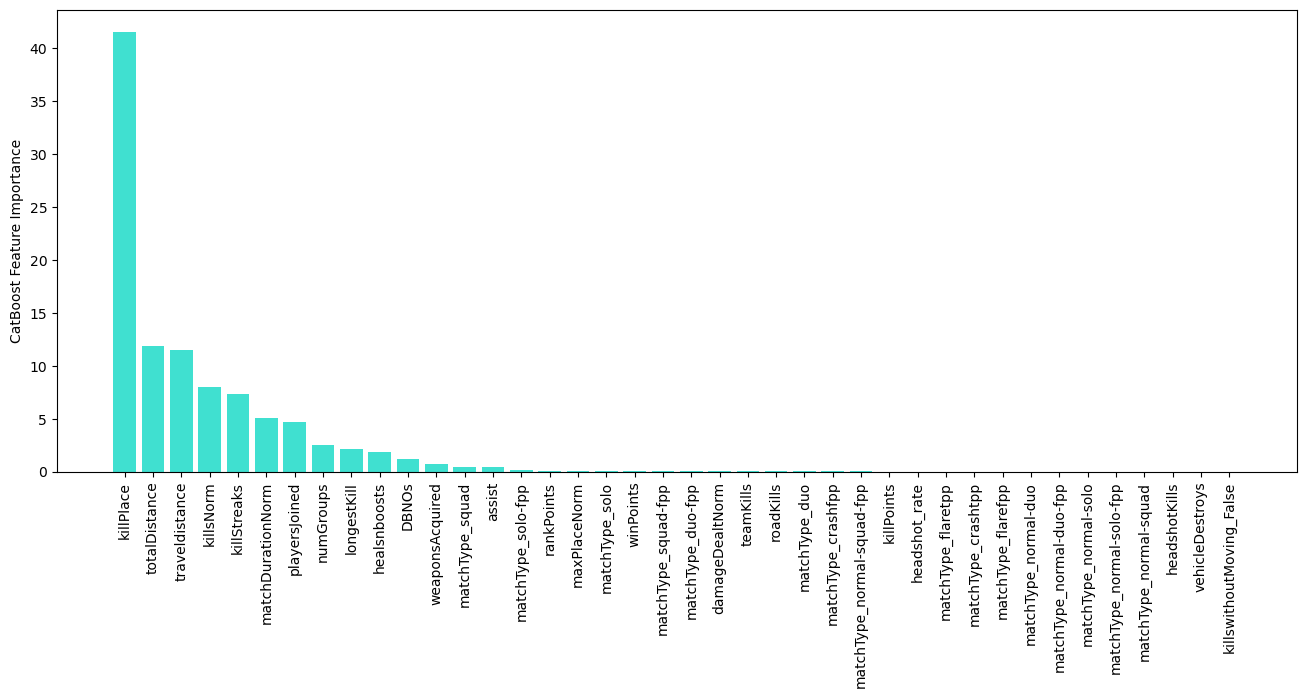

In [95]:
plt.bar(feature_importance_df.features, feature_importance_df.importance, color='turquoise')
plt.ylabel("CatBoost Feature Importance")
plt.xticks(rotation = 90)
plt.show()


In [96]:
pred = model.predict(xtest)


In [97]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.08
R2: 0.93


<center><img src="https://media1.tenor.com/m/_Ahg5u-SD3cAAAAd/winner-winner-chicken-dinner-match4.gif"></center>
